<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/SIA/TP4/Spot_Tumour_in_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!gdown --id 1A2IU8Sgea1h3fYLpYtFb2v7NYdMjvEhU
!tar -xf /content/Task01_BrainTumour.tar
!pip install pybids

In [ ]:
import numpy as np
import os
import json

def get_decathlon_filelist(data_path, seed=816, split=0.85):
    """
    Get the paths for the original decathlon files
    """
    json_filename = os.path.join(data_path, "dataset.json")

    try:
        with open(json_filename, "r") as fp:
            experiment_data = json.load(fp)
    except IOError as e:
        raise Exception("File {} doesn't exist. It should be part of the "
              "Decathlon directory".format(json_filename))

    # Print information about the Decathlon experiment data
    print("*" * 30)
    print("=" * 30)
    print("Dataset name:        ", experiment_data["name"])
    print("Dataset description: ", experiment_data["description"])
    print("Tensor image size:   ", experiment_data["tensorImageSize"])
    print("Dataset release:     ", experiment_data["release"])
    print("Dataset reference:   ", experiment_data["reference"])
    print("Dataset license:     ", experiment_data["licence"])  # sic
    print("=" * 30)
    print("*" * 30)

    """
	Randomize the file list. Then separate into training and
	validation lists. We won't use the testing set since we
	don't have ground truth masks for this; instead we'll
	split the validation set into separate test and validation
	sets.
	"""
    # Set the random seed so that always get same random mix
    np.random.seed(seed)
    numFiles = experiment_data["numTraining"]
    idxList = np.arange(numFiles)  # List of file indices
    np.random.shuffle(idxList) # Shuffle the indices to randomize train/test/split
    
    trainIdx = int(np.floor(numFiles*split)) # index for the end of the training files
    trainList = idxList[:trainIdx]

    otherList = idxList[trainIdx:]
    numOther = len(otherList)
    otherIdx = numOther//2  # index for the end of the testing files
    validateList = otherList[:otherIdx]
    testList = otherList[otherIdx:]

    trainFiles = []
    for idx in trainList:
        trainFiles.append(os.path.join(data_path, experiment_data["training"][idx]["label"]))

    validateFiles = []
    for idx in validateList:
        validateFiles.append(os.path.join(data_path, experiment_data["training"][idx]["label"]))

    testFiles = []
    for idx in testList:
        testFiles.append(os.path.join(data_path, experiment_data["training"][idx]["label"]))

    print("Number of training files   = {}".format(len(trainList)))
    print("Number of validation files = {}".format(len(validateList)))
    print("Number of testing files    = {}".format(len(testList)))

    return trainFiles, validateFiles, testFiles

trainFiles, validateFiles, testFiles = get_decathlon_filelist("/content/Task01_BrainTumour")

# Goal of this Lab

* Work like a Deep Learning Engineer
* Apply all things you've learned through all the labs
* Understand your Datasets
* Try models from your knowledge

Don't hesitate to discuss with your lab coworkers in order to gather ideas. Feel free to use whatever framework you need. Understand as much possible the dataset before beginning to work on the model. Do your research ...


---


**You are free of all your decisions. Any unjustified move will not be taken into consideration into your notation. An analysis of your results/model/move is awaited.**



---


Timing approx :

* 2 hours : Data Understanding/Dataset writing
* 30min -1h : Model/ Training pipeline writing & training
* 1h-1h30 : Results understanding and showcase

# Main Question

** Build a Model that spots and show Tumour in Brain MRI scanners. **

As a helper, we give you some indications :
* get_decathlon_filelist gives you an iterable over the nii.gz files of the label datasets. In order to get the training images replace labelsTr by imagesTr (as shown in the next cell). 
* nii.gz files are NIFTI files. They are used for medical imaging. In order to read nii.gz files, look at the next cell.
* The tumour is any value > 0 in a slice in the label NIFTI file. Every slice is not as important as others.

In [ ]:
trainFiles_label = trainFiles
trainFiles_images = [i.replace('labelsTr', 'imagesTr') for i in trainFiles]

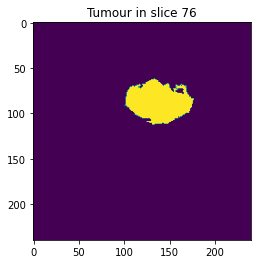

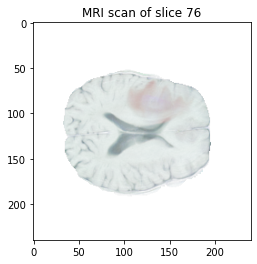

In [60]:
import nibabel as nib
import matplotlib.pyplot as plt

img = np.array(nib.load(trainFiles_images[127]).dataobj) # To get the array of the NIFTI file in trainFiles image
img_label = np.array(nib.load(trainFiles_label[127]).dataobj) # To get the array of the NIFTI file in trainFiles label

img = (img - img.min()) / (img.max() - img.min()) # Some type of normalization, Choose wisely
label = (img_label - img_label.min()) / (img_label.max() - img_label.min()) # Some type of normalization, Choose wisely
label[label>0] = 1 # Highlighting the tumour


# Showcase 
slice_value = 76 # Try different values to understand what this is
plt.imshow(label[:,:,slice_value])
plt.title('Tumour in slice %s' % slice_value)
plt.show()
plt.imshow(img[:,:,slice_value])
plt.title('MRI scan of slice %s' % slice_value)
plt.show()